# 1. Importing the libraries



*   Pandas for data manipulation

*   Sklearn for setting up the train-test split, importing TfIdfVectorizer, Support Vector Machine, classification report and confusion matrix
*   Imblearn for importing SMOTE for resampling the data


*   NumPy for numerical computations



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np

# 2. Loading the Dataset

Here, we import the csv file named spam.csv into a pandas dataframe df

*   encoding = 'utf-8': specifies the file's encoding, i.e, the way of reading and writing the data from the csv file should be in the widely used 'UTF-8' format
*   encoding_erros = 'ignore': Ignores any encoding errors that might occur while reading the file



In [3]:
#Load dataset
df = pd.read_csv(r'C:\Users\NATHAN\Downloads\spam.csv', encoding = 'utf-8', encoding_errors = 'ignore')

In [4]:
#overview of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# 3. Preparing the data

We just want two columns v1 and v2 of the data as the other features dont contribute much information

In [5]:
#Checking column names (assuming 'v1' is the label and 'v2' is the message)
df.columns = ['label','message','Unnamed:2','Unnnamed:3','Unnamed:4']
df = df[['label','message']] # only keep the necessary columns

In [6]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


C:\Users\NATHAN\AppData\Local\Temp\ipykernel_2524\1136187974.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label',data=df,palette=['steelblue','firebrick'],ax=ax)


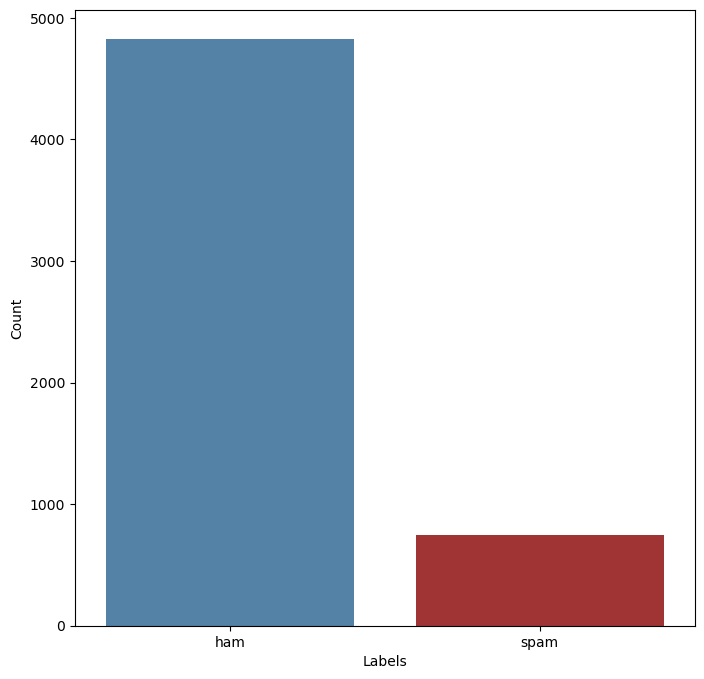

In [11]:
#Visualising the count
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x='label',data=df,palette=['steelblue','firebrick'],ax=ax)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()


In [12]:
df['label'].value_counts(normalize = True) #we want to know the proportion of spam and ham values

label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

# 4. Splitting the Data into training and testing sets
The train_test_split function is used to split the dataset into training and testing sets

*   test_size = 0.25: specifies that 75% of the data will be used for training and 25% of the data will be used for testing
*   stratify = df['label']: Ensures that the proportion of spam vs ham messages is maintained in both training and test sets for efficient training and prediction




In [13]:
#Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(df['message'],df['label'],test_size = 0.25, stratify=df['label'],random_state = 42)

# 5. Vectorizing the Text Data

We vectorize the data so as to convert the words(categorical values) to numbers(continuous values) so as to allow the model to efficiently process the data
1.   TfidfVectorizer(stop_words='english',ngram_range=(1,3),max_df=0.2): Initializes a Tfidfvectorizer, which converts the text into a matrix of token counts(based on their importance), ignoring the less relevant words like is,are etc.
1.   fit_transform(X_train): learns the vocabulary from the training set and transforms the training text data into a sparse matrix of token counts
2.   transform(X_test): Transforms the test text data into the same matrix format, using the vocabulary learnt from the training data






In [14]:
#using the tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,3),max_df=0.2)
X_train_count = tfidf_vectorizer.fit_transform(X_train)
X_test_count = tfidf_vectorizer.transform(X_test)

In [15]:
X_train_count.todense() #view of the sparse matrix

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
y_train.value_counts(normalize=True) #checking whether the proportion is maintained

label
ham     0.865997
spam    0.134003
Name: proportion, dtype: float64

# 6.Applying SMOTE to Handle Class Imbalance
Smote(Synthetic Minority Over-Sampling Technique) is used to resample,i.e, feed the similar data again and again for the model to learn effectively. It addresses class imbalance in datasets. The same data is fed along with an additional interpolation between minority class examples.


*   SMOTE(sampling_strategy='minority',random_state = 42): Creates an instance of SMOTE with a random state for reproducibility
*   fit_resample(X_train_count, y_train):
    Applies SMOTE to the training data:

1.   X_train_count = The vectorized text data of the training set
2.   y_train = The labels(spam/ham) of the training set

3.   X_train_smote, y_train_smote: Outputs the new balanced training set after adding synthetic examples to the minority class


In [17]:
#Apply SMOTE to the training set
smote = SMOTE(sampling_strategy='minority',random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_count, y_train)

In [18]:
y_train_smote.value_counts(normalize=True) #equal proportions of data

label
ham     0.5
spam    0.5
Name: proportion, dtype: float64

# 7.Training the SVM Model


*   SVC(kernel='linear', random_state=42): initializes an SVM classifier with a linear kernel(linear boundary separating the two categories)
*   fit(X_train_smote, y_train_smote):
Trains the Support Vector machine using the SMOTE balanced training data



In [19]:
#Train the SVM Model
svm_model = SVC(kernel='linear',random_state = 42)
svm_model.fit(X_train_smote,y_train_smote)


SVC(kernel='linear', random_state=42)

In [20]:
#Making predictions
y_pred = svm_model.predict(X_test_count)

# 8.Evaluating the model
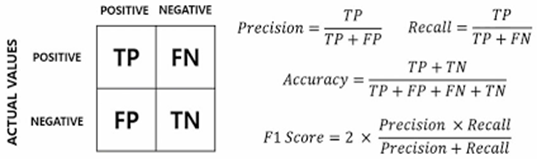

In [21]:
#Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

         ham     0.9901    0.9967    0.9934      1206
        spam     0.9777    0.9358    0.9563       187

    accuracy                         0.9885      1393
   macro avg     0.9839    0.9663    0.9748      1393
weighted avg     0.9884    0.9885    0.9884      1393

Confusion Matrix:
 [[1202    4]
 [  12  175]]
